Considere o banco de dados de nomes americanos. Segundo McKinney (2012), em 2007, uma pesquisadora chaamda Laura Wattenberg mostrou em seu webiste website (http://www.babynamewizard.com) que a distribuição da última letra dos nomes masculinos mudou significativamente nos últimos anos. Construa duas tabelas, uma para meninos e outra para meninas, uma tabela com a freqüência relativa, por decada, de cada uma das 26 letras nos finais dos nomes próprios. A sua tabela coincide com a hipótese de Wattenberg?

In [1]:
import pandas as pd
baby = pd.read_csv("http://www.ime.unicamp.br/~gvludwig/2018s2-me315/baby-names.csv")
baby['endswith'] = baby.loc[:,'name'].apply(lambda x:x[-1])
newBaby = baby.groupby(['sex','year','endswith']).sum().reset_index()
newBaby['decade'] = newBaby.year//10
decades = newBaby.groupby(['sex','decade','endswith']).sum().reset_index()
decades.head()

,sex,decade,endswith,year,percent
0,boy,188,a,18845,0.063203
1,boy,188,b,18845,0.038985
2,boy,188,c,18845,0.025893
3,boy,188,d,18845,0.800700
4,boy,188,e,18845,1.182701


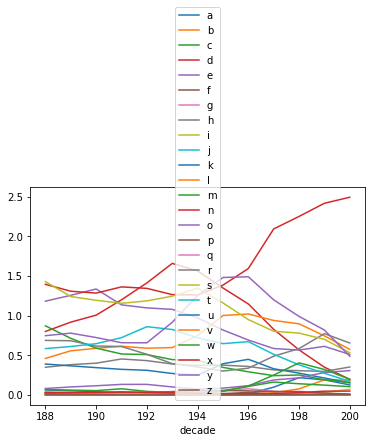

In [46]:
boys = decades[decades['sex']=='boy']
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for key, grp in boys.groupby(['endswith']):
    ax = grp.plot(ax=ax, kind='line', x='decade', y='percent', label=key)

plt.legend(loc='best')
plt.show()

In [48]:
girls = decades[decades['sex']=='girl']
girls.head()

,sex,decade,endswith,year,percent
312,girl,188,a,18845,3.143855
313,girl,188,c,3765,0.000085
314,girl,188,d,18845,0.064837
315,girl,188,e,18845,3.466953
316,girl,188,g,18845,0.001022
